# Week 8: Image Clustering with K-Means

In this notebook you are able to first use the **MobileNet** model to get a 1000 features for each image. When doing this task remember what these features represent and what they tell us about each image. This will heavily influence how the clusters are made!

We can then use this representation to cluster images together, and investigate each cluster. 


In [1]:
# !pip install tensorflow

In [2]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import tensorflow.keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline

# Load and resize images 

We load in all the images and resize them to 224 x 224, as this is the resolution we need for inputting to MobileNet

In [3]:
#Path to folder
path_to_images = "data/osca"
#image extension
file_type = ".jpg"
#Pick image size
img_height = 224
img_width = 224
#Is it rgb or black and white?
channels = 3

In [4]:
#Get all paths
paths = []
for root, dirs, files in os.walk(path_to_images, topdown=False):
    for name in files:
        if file_type in name.lower():
            paths.append(str(os.path.join(root, name)))
#Load in images
dataset = [np.array(img_to_array(load_img(i,target_size=((img_height,img_width)))))/255.0 for i in paths]
dataset = np.array(dataset).astype("float32")
dataset.shape

(802, 224, 224, 3)

### Load a pretrained model

In [5]:
model = tensorflow.keras.applications.MobileNetV2(input_shape=(224,224,3), alpha=1.0, weights='imagenet', pooling=None)

### Get Image Features

We end up with 1000 features for each image (may take a while depending on dataset size!)

In [6]:
pred = model.predict(dataset)
print(pred.shape)
x = pred.reshape(dataset.shape[0], -1)

26/26 [==============================] - 24s 881ms/step
(802, 1000)


# Clustering 

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Standardise 

First we have to standardise the range of the dataset, as PCA and K-Means are effected by scale.

In [8]:
x = StandardScaler().fit_transform(x)

## Plot in 2D

Now we can use PCA to reduce the dataset to only 2 dimensions. This means we can plot it on a 2D axis.

In [9]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

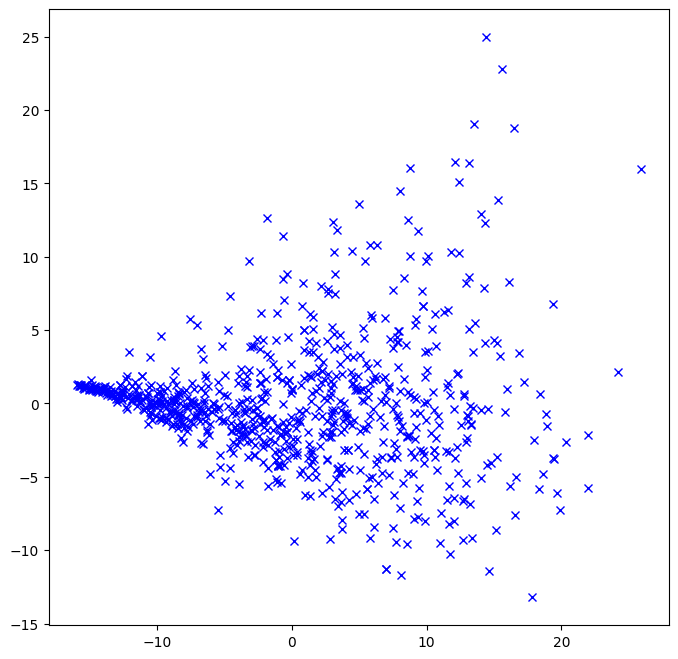

In [10]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [11]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

### Elbow Plot

In [36]:
scores=[]
for i in range(1,30):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

KeyboardInterrupt: 

In [35]:
# # save score
# np.savetxt('kmeans_scores1.txt', scores)


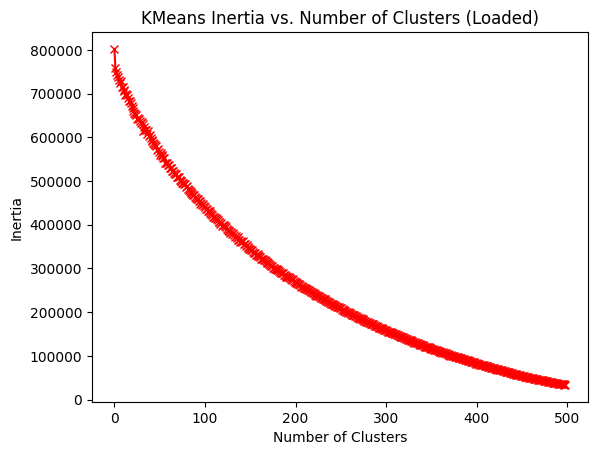

In [39]:
# load score
loaded_scores = np.loadtxt('images/kmeans_scores1.txt')

# plot the score
plt.plot(loaded_scores, "-rx")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('KMeans Inertia vs. Number of Clusters (Loaded)')
plt.show()


# Cluster and Plot

First try with all the features. 

You may find that your clusters and their centres don't look right. Remember, we are clustering based on **all** of the features, and then reducing down to 2 dimensions to plot. 

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


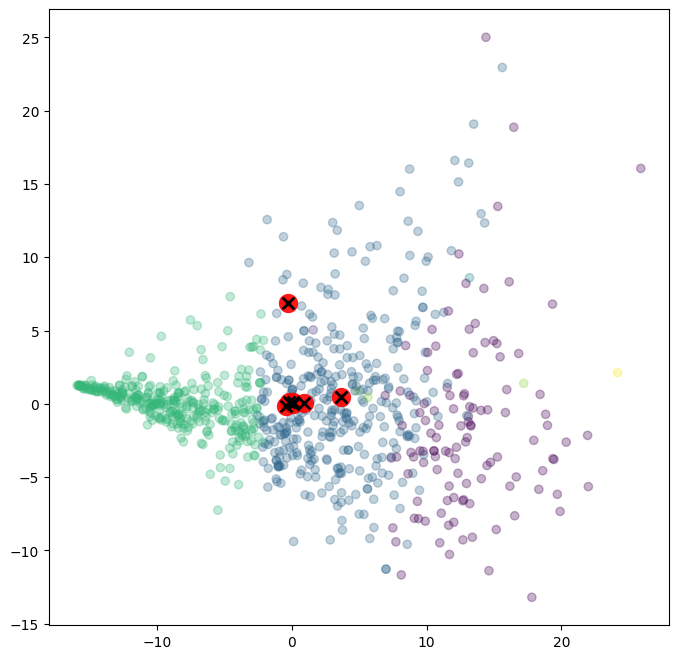

In [40]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

### Reducing Dimensions before clustering

You can also try reducing the dimensions before clustering, which may give you better results.

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


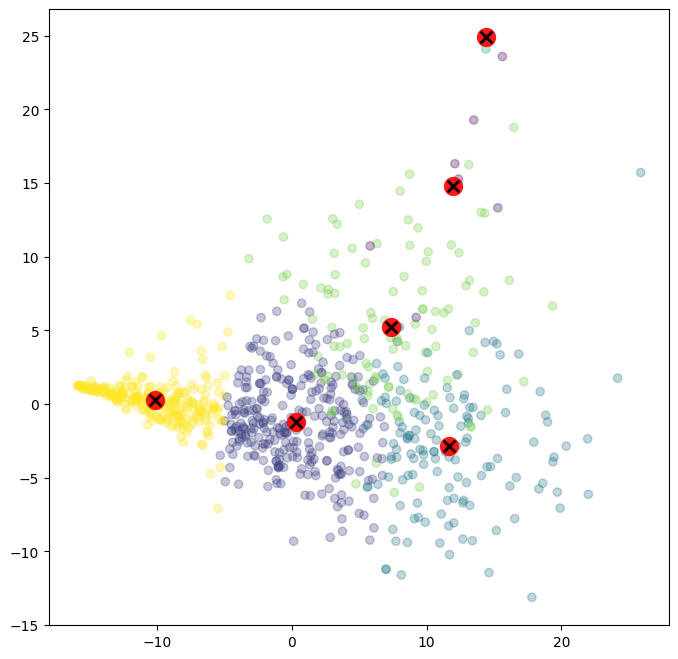

In [88]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 20

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


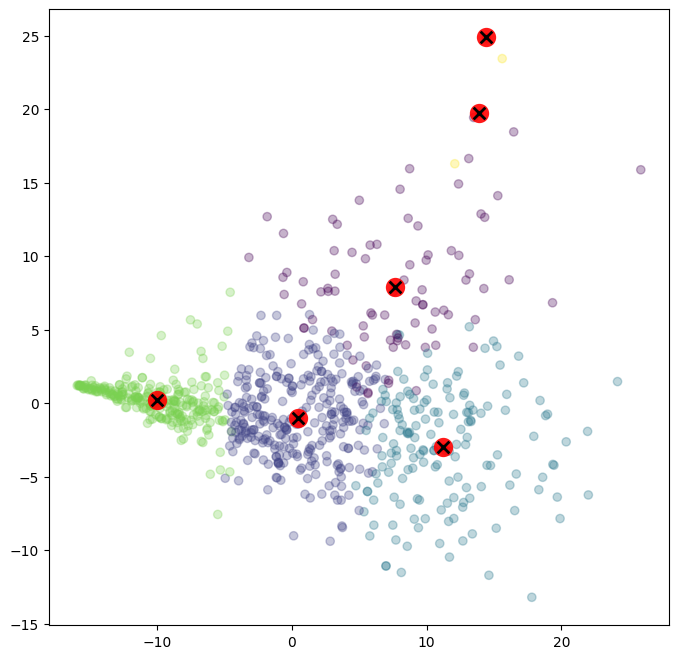

In [101]:
k=6
#How many dimensions to reduce to (before clustering)?
num_dimensions = 20

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

# Examine Clusters
### Examine representative images


In [102]:
#Define this custom function to display images in grid
from PIL import Image
from PIL import ImageDraw 
from PIL import ImageFont
font = ImageFont.truetype("../data/Arial.ttf", 24)
#Define custom function to display images
def image_grid(imgs, rows, cols, labels = False):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    draw = ImageDraw.Draw(grid)
    for i, img in enumerate(imgs):
        r = i//cols
        c = i%cols
        pt = (c*w, r*h)
        color = (255,255,255)
        grid.paste(img, box=pt)
        if labels:
            label = "Cluster "+str(r) 
            draw.text(pt,label,color,font=font)
    return grid

### Pick your number of clusters

In [103]:
#How many clusters?
k = 6

In [104]:
#Get image closest to the centre for each cluster
kmeans = KMeans(n_clusters=k, random_state=42)
#dist to each cluster center for each image
x_dist = kmeans.fit_transform(x_less_dimensions)

/Users/autumn/miniconda3/envs/stem/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


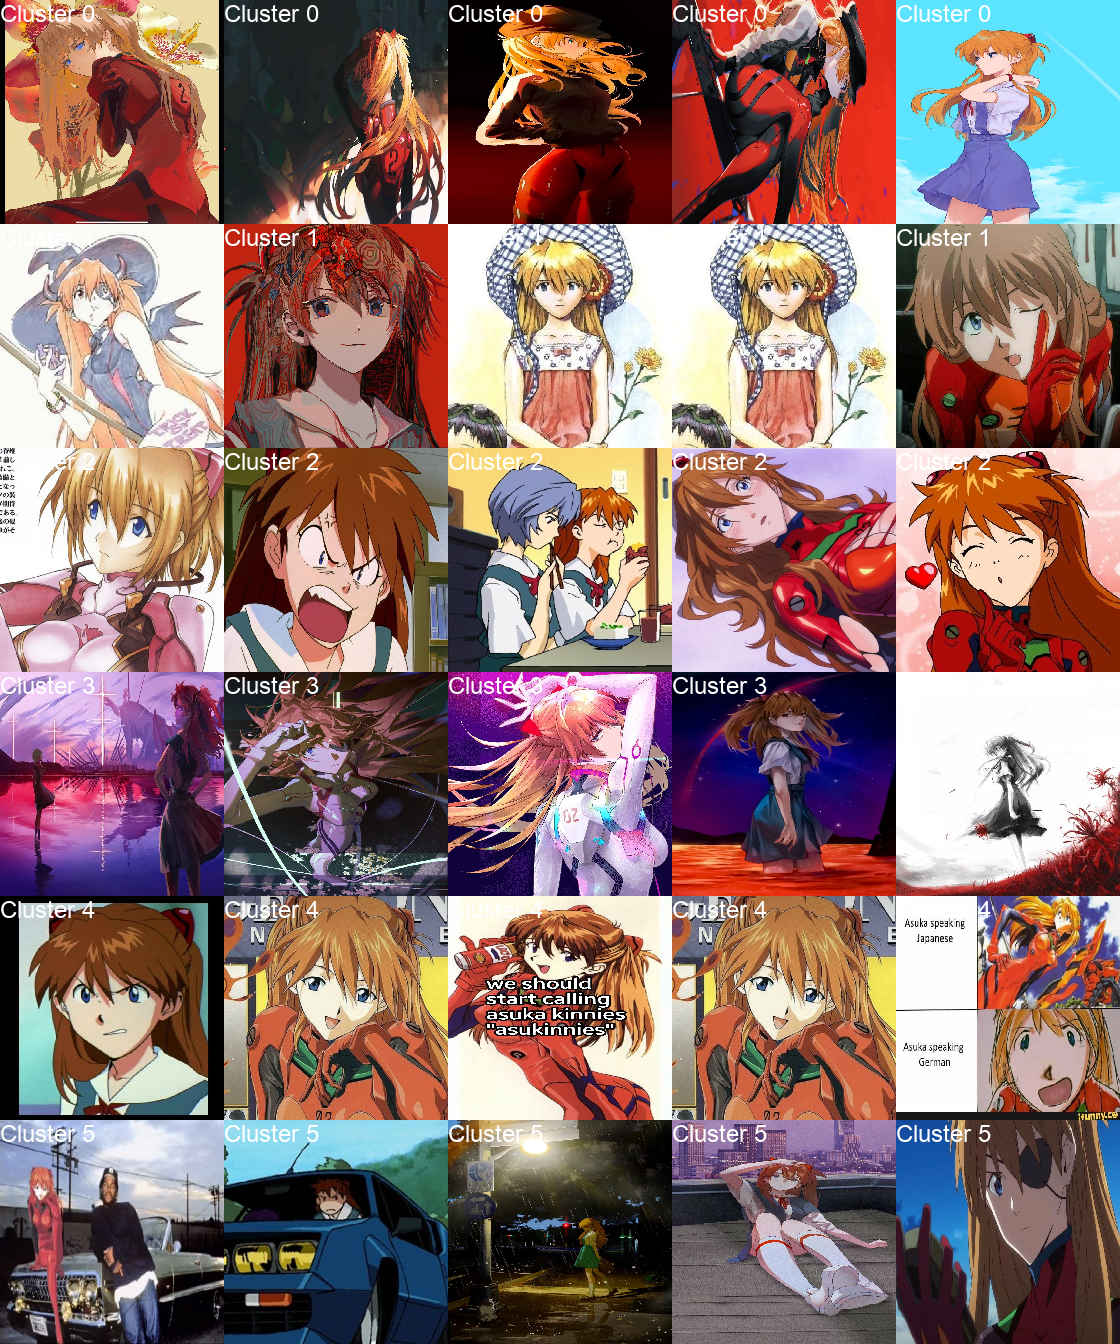

<Figure size 1000x1000 with 0 Axes>

In [105]:
cols = 5
indexes = np.array([]).astype(int)
for i in range(k):
    #Get distances for a given cluster (for all images)
    cluster_dist = x_dist[:,i]
    #Sort ascending (shortest distance first) and take nearest 3
    cluster_indexes = cluster_dist.argsort(axis = 0)[:cols]
    indexes = np.concatenate((indexes,cluster_indexes))
    
to_show = dataset[indexes]
to_show = [array_to_img(i) for i in to_show]
plt.figure(figsize=(10,10))

image_grid(to_show, k, cols, True)

### Examine most representative images for a given cluster

Here we can dive deeper and print out more images from a given cluster

In [106]:
#What cluster do you want to look at?
cluster = 5
#How many images do you want to see?
num_to_show = 12

Images Nearest the Centre of Cluster 5


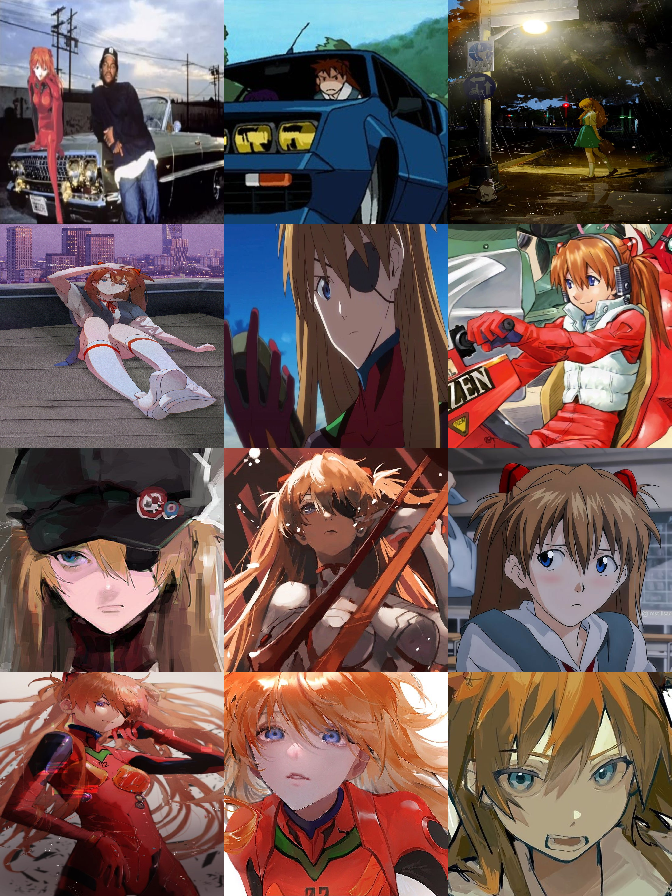

<Figure size 1000x1000 with 0 Axes>

In [107]:
cluster_dist = x_dist[:,cluster]
#Sort ascending (shortest distance first)
representative_indexes = cluster_dist.argsort(axis = 0)
representative_ims = dataset[representative_indexes]
to_show = representative_ims[:num_to_show]
to_show = [array_to_img(i) for i in to_show]
plt.figure(figsize=(10,10))

#How to display images (rows x cols should equal num_images!)
print("Images Nearest the Centre of Cluster " + str(cluster)) 
image_grid(to_show, 4, 3)

In [108]:
#What cluster do you want to look at?
cluster = 0
#How many images do you want to see?
num_to_show = 12

Images Nearest the Centre of Cluster 0


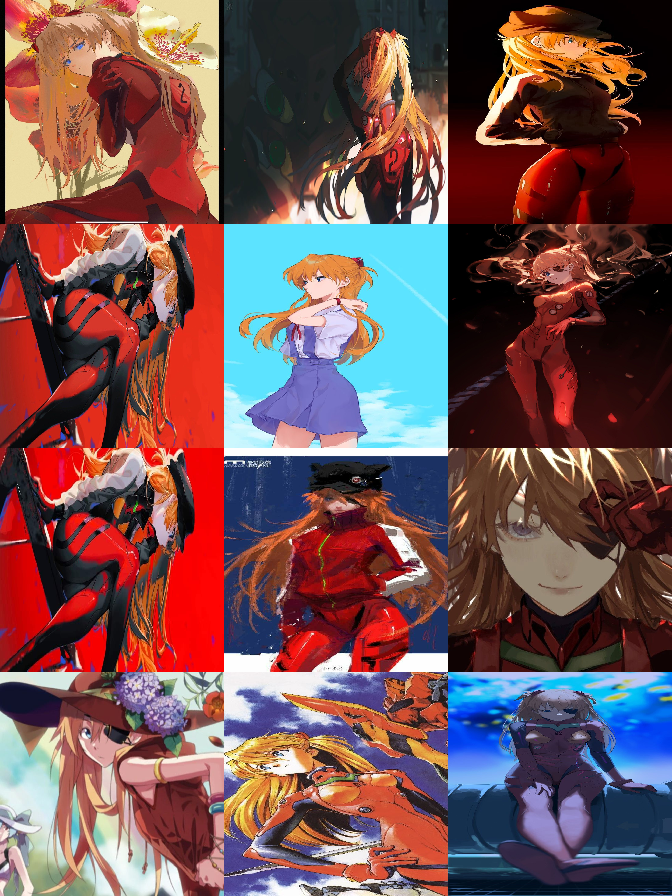

<Figure size 1000x1000 with 0 Axes>

In [109]:
cluster_dist = x_dist[:,cluster]
#Sort ascending (shortest distance first)
representative_indexes = cluster_dist.argsort(axis = 0)
representative_ims = dataset[representative_indexes]
to_show = representative_ims[:num_to_show]
to_show = [array_to_img(i) for i in to_show]
plt.figure(figsize=(10,10))

#How to display images (rows x cols should equal num_images!)
print("Images Nearest the Centre of Cluster " + str(cluster)) 
image_grid(to_show, 4, 3)